<a href="https://colab.research.google.com/github/mythri1996/HR-Analytics-Job-Change-of-Data-Scientists-using-ML-/blob/main/job_change_tods_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
cd drive/MyDrive/project_ML/Classification/

/content/drive/MyDrive/project_ML/Classification


In [ ]:
ls

 aug_test.csv                 task_socialmedia_add.ipynb
 aug_train.csv               'wine classifier.ipynb'
 job_change_tods_data.ipynb   wine.csv
 Social_Network_Ads.csv       wine_navisbayes.ipynb


In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Loading The Data Into Pandas


In [168]:
jdd1=pd.read_csv('aug_train.csv')
jdd2=pd.read_csv("aug_train.csv")

## EDD

In [169]:
jdd1.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [173]:
jdd2.tail(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [174]:
jdd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [175]:
jdd1.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [176]:
jdd1.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [177]:
jdd1.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

It is showing 8 of colmns null values present

In [178]:
jdd1.shape

(19158, 14)

## **Data preprocessing:**

*   1.handling missing values
*  2.handling categorical values


## Data visualization

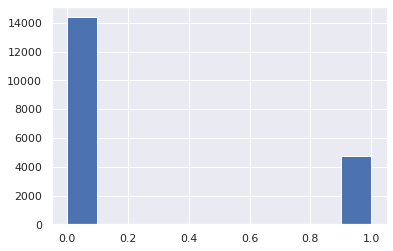

In [179]:
#visualizing target column 
jdd1['target'].hist()

In [180]:

jdd1['target'].isnull().sum()

0

In [181]:
# this shows data is imbalanced
jdd1['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

**relevent_experience**

In [182]:
jdd1["relevent_experience"].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


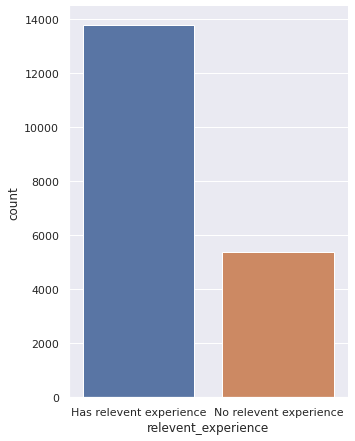

In [183]:
import seaborn as sns
sns.catplot("relevent_experience",data=jdd1, kind="count", height=6,aspect=.8)

**training_hours**

In [184]:
jdd1['training_hours'].value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
272      5
234      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributional of training_hours')

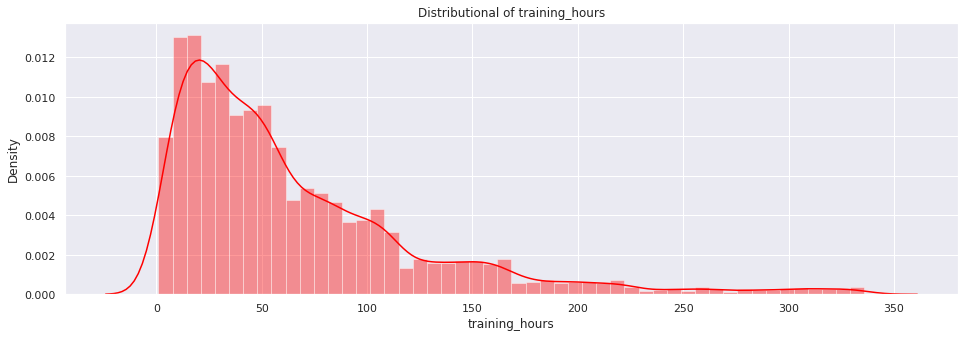

In [185]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(jdd1["training_hours"], color="red",ax = axes)
plt.title("Distributional of training_hours")

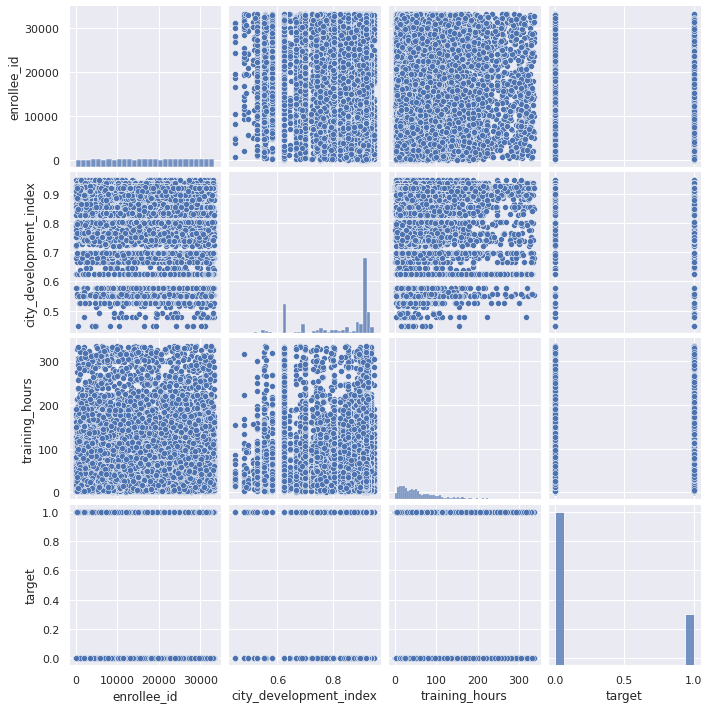

In [186]:
sns.pairplot(jdd1)


#missing values in the dataset


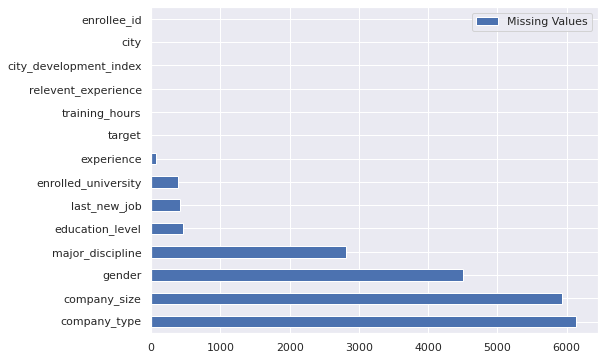

In [187]:
sns.set(style="darkgrid")
pd.DataFrame(jdd1.isna().sum().sort_values(ascending=False), columns=['Missing Values']
            ).plot(kind='barh', figsize=(8,6))
plt.show()

 **Number of employees with different education backround  across enrolled university**

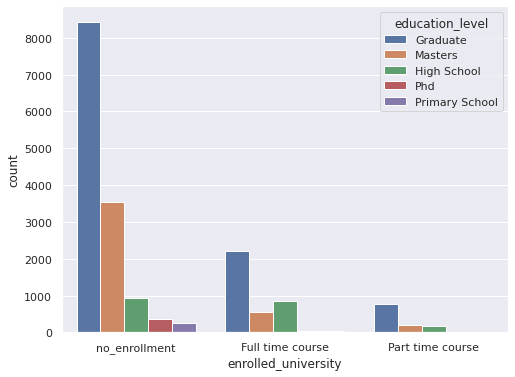

In [188]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='enrolled_university',hue='education_level',data=jdd1)

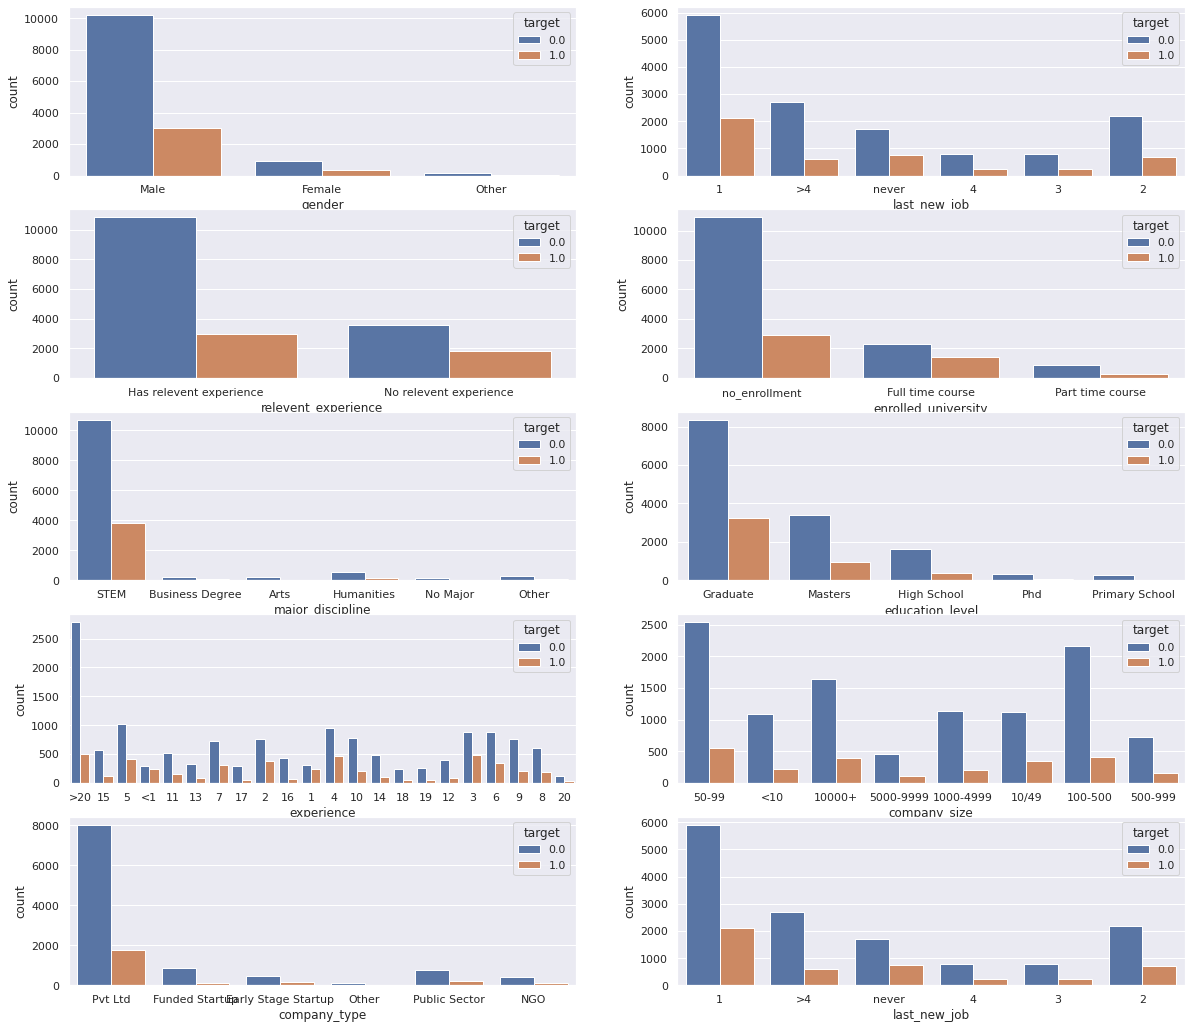

In [189]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(5, 2, figsize=(20,18))
sns.countplot(x='gender',hue="target",data=jdd1,ax=ax[0,0])
sns.countplot(x='last_new_job',hue="target",data=jdd1, ax=ax[0,1])
sns.countplot(x='relevent_experience',hue="target",data=jdd1, ax=ax[1,0])
sns.countplot(x='enrolled_university',hue="target",data=jdd1, ax=ax[1,1])
sns.countplot(x='major_discipline',hue="target",data=jdd1, ax=ax[2,0])
sns.countplot(x='education_level',hue="target",data=jdd1, ax=ax[2,1])
sns.countplot(x='experience',hue="target",data=jdd1, ax=ax[3,0])
sns.countplot(x='company_size',hue="target",data=jdd1, ax=ax[3,1])
sns.countplot(x='company_type',hue="target",data=jdd1, ax=ax[4,0])
sns.countplot(x='last_new_job',hue="target",data=jdd1, ax=ax[4,1])

## handling missing values


In [190]:
jdd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [191]:
jdd1['gender'].replace(to_replace=['Male','Female','Other'],value=[0,1,2],inplace=True)


In [192]:
jdd1['relevent_experience'].replace(to_replace = ['Has relevent experience', 'No relevent experience'], value = [0,1], inplace =True) 


In [193]:
jdd1['enrolled_university'].replace(to_replace = ['no_enrollment','Full time course','Part time course'], value =[0,1,2],inplace = True)



In [194]:
jdd1['education_level'].replace(to_replace = ['High School', 'Graduate','Masters','Phd','Primary School'], value =[0,1,2,3,4], inplace =True)


In [195]:
jdd1['company_type'].replace(to_replace = ['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other','Public Sector', 'NGO'], value = [0,1,2,3,4,5],inplace = True)

In [196]:
jdd1['experience'].replace(to_replace = ['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4', '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'] , value = [21,15,5,0,11,13,7,17,2,16,1,4,10,14,18,19,12,3,6,9,8,20],inplace=True)

In [197]:
jdd1['last_new_job'].replace(to_replace = ['1', '>4', 'never', '4', '3', '2'], value=[1,5,0,4,3,2], inplace =True)

In [198]:
jdd1['company_size'].replace(to_replace =['<10','10/49','50-99','100-500', '500-999', '1000-4999', '5000-9999','10000+'], value=[0,1,2,3,4,5,6,7], inplace=True)

In [199]:
jdd1['major_discipline'].replace(to_replace =['STEM','Business Degree','Arts','Humanities','No Major','Other'], value=[0,1,2,3,4,5], inplace=True)

## Label Encoder

In [200]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
jdd1['city']=le.fit_transform(jdd1['city'])

In [201]:
jdd1['city'].values

array([ 5, 77, 64, ...,  5, 94, 95])

In [202]:
jdd1['gender'].value_counts()

0.0    13221
1.0     1238
2.0      191
Name: gender, dtype: int64

In [203]:
jdd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  float64
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  float64
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(10), int64(4)
memory usage:

handling missing values with mean

In [204]:
jdd1['relevent_experience'] = jdd1['relevent_experience'].fillna((jdd1['relevent_experience'].mean()))
jdd1['enrolled_university'] = jdd1['enrolled_university'].fillna((jdd1['enrolled_university'].mean()))
jdd1['education_level'] = jdd1['education_level'].fillna((jdd1['education_level'].mean()))
jdd1['company_type'] = jdd1['company_type'].fillna((jdd1['company_type'].mean()))
jdd1['experience'] = jdd1['experience'].fillna((jdd1['experience'].mean()))
jdd1['company_size'] = jdd1['company_size'].fillna((jdd1['company_size'].mean()))
jdd1['last_new_job'] = jdd1['last_new_job'].fillna((jdd1['last_new_job'].mean()))

In [205]:
jdd1.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

Showing 2 of columns null values are present

In [206]:
jdd1['gender'] = jdd1['gender'].fillna((jdd1['gender'].mean()))
jdd1['major_discipline'] = jdd1['major_discipline'].fillna((jdd1['major_discipline'].mean()))

In [207]:
jdd1.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Standardization

In [208]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#X = scaler.fit_transform(x)

# Balancting the Dataset

## Up Sampling

In [234]:
x=jdd1.drop(['target'],axis=1).values
y=jdd1['target'].values


from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(1.0)
x_res1,y_res1=os.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Up sampling count

In [235]:
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_res1)))


The number of classes before fit Counter({0.0: 14381, 1.0: 4777})
The number of classes after fit Counter({1.0: 14381, 0.0: 14381})


# SMOTE

In [236]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(1.0)
x_res2,y_res2 = smk.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Smote

In [237]:
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_res2)))

The number of classes before fit Counter({0.0: 14381, 1.0: 4777})
The number of classes after fit Counter({1.0: 13371, 0.0: 13371})


## After sampling 

In [238]:
after_sampling=pd.DataFrame(y_res2,columns=['y_res2'])
after_sampling.value_counts()

y_res2
1.0       13371
0.0       13371
dtype: int64

In [239]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.95)
x_res1,y_res1=os.fit_sample(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Splitting train and test

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x_res2,y_res2,train_size=0.8)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(21393, 13) (5349, 13) (21393,) (5349,)


# Naive bayes

In [241]:
model = GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.660497289212937

# KNN

In [242]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [243]:
def calculateAccuracy(y_pred,y_test):
      accuracy = accuracy_score(y_pred,y_test)
      return accuracy

In [244]:
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7378949336324546


#  XGBClassifier

In [245]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_pred,y_test))

0.8606553545552283
0.8650214993456721


## Tuning the model

In [246]:
model=XGBClassifier(max_depth=2,subsample=3,n_estimators=1000,learning_rate=0.,
                    random_state=4,min_child_weight=5,reg_alpha=0, reg_lambda=1)
model = XGBClassifier()
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
y_pred = model.predict(x_test)
print("Training score",accuracy_score(y_train_pred,y_train))
print("testing score",accuracy_score(y_pred,y_test))

Training score 0.8606553545552283
testing score 0.8650214993456721
